In [1]:
import numpy as np
from cython_weave import *
from matplotlib import pyplot as plt
from scipy import signal

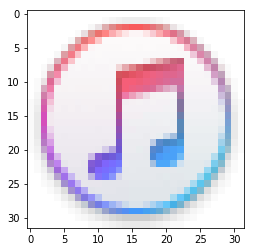

In [2]:
dog = plt.imread('images/icon.png')
plt.imshow(dog)
plt.show()
dog = np.rollaxis(dog, 2, 0)

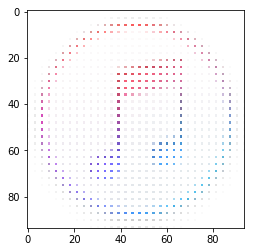

In [3]:
weave_param = {'num_zeros':2, 'filter_size': 3}
e_dog, _ = zero_weave_fast_forward(dog.astype(float), weave_param)
e_dog = np.rollaxis(e_dog, 0, 3)
plt.imshow(e_dog)
plt.show()

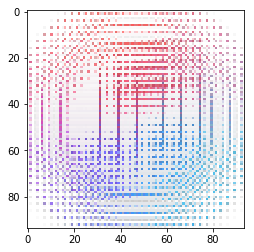

In [4]:
weave_param = {'num_zeros':2, 'filter_size': 3}
a_dog, _ = array_weave_fast_forward(dog.astype(float), weave_param, include_center=True)
a_dog = np.rollaxis(a_dog, 0, 3)
plt.imshow(a_dog)
plt.show()

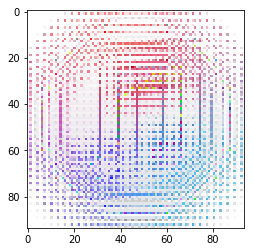

In [5]:
total_dog = e_dog + a_dog
plt.imshow(total_dog)
plt.show()

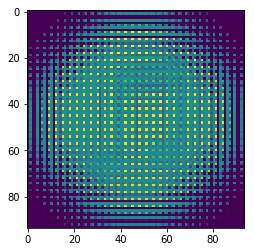

In [6]:
conv = np.ones([3,3])
total_dog = total_dog.sum(axis = 2)
total_dog.shape
plt.imshow(total_dog)
plt.show()

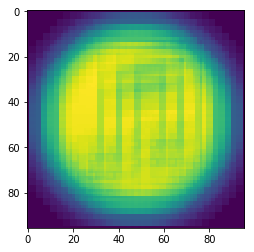

In [7]:
total_dog = signal.convolve2d(total_dog, conv, mode='full', boundary='fill', fillvalue=0)
plt.imshow(total_dog)
plt.show()

In [8]:
import tensorflow as tf
from pyrm_net import *
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical

/Users/Tim/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(y_test.shape)

(50000, 3, 32, 32)
(10000, 10)


In [10]:
model = build_pyrm_net(4, 1)
model.summary()

First round should be a unit
First round should be a unit
First round should be a unit
First round should be a unit
First round should be a unit
First round should be a unit
First round should be a unit
First round should be a unit
Layer 1 Size: 8
Layer 1 Size: 4
prev_layer_out size: 8
Layer : 1 inds: [0, 1]
Layer : 1 inds: [2, 3]
Layer : 1 inds: [4, 5]
Layer : 1 inds: [6, 7]
Layer 2 Size: 2
prev_layer_out size: 4
Layer : 2 inds: [0, 1]
Layer : 2 inds: [2, 3]
Layer 3 Size: 1
prev_layer_out size: 2
Layer : 3 inds: [0, 1]
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, 32, 32)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 3, 34, 34)    0           input_1[0][0]

In [12]:
viewer = keras.callbacks.TensorBoard()
model.fit(x_train,y_train, epochs = 10, verbose = 1, callbacks=[viewer])

Epoch 1/10
50000/50000 [==============================] - 665s 13ms/step - loss: 2.1210 - acc: 0.2166
Epoch 2/10
50000/50000 [==============================] - 668s 13ms/step - loss: 1.9252 - acc: 0.2789
Epoch 3/10
50000/50000 [==============================] - 676s 14ms/step - loss: 1.8097 - acc: 0.3285
Epoch 4/10
50000/50000 [==============================] - 666s 13ms/step - loss: 1.7378 - acc: 0.3562
Epoch 5/10
50000/50000 [==============================] - 669s 13ms/step - loss: 1.6872 - acc: 0.3766
Epoch 6/10
50000/50000 [==============================] - 663s 13ms/step - loss: 1.6546 - acc: 0.3863
Epoch 7/10
50000/50000 [==============================] - 669s 13ms/step - loss: 1.6338 - acc: 0.3959
Epoch 8/10
50000/50000 [==============================] - 660s 13ms/step - loss: 1.6155 - acc: 0.4003
Epoch 9/10
50000/50000 [==============================] - 642s 13ms/step - loss: 1.5975 - acc: 0.4091
Epoch 10/10
50000/50000 [==============================] - 644s 13ms/step - loss: 

In [13]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 61s 6ms/step


[1.5737825569152832, 0.4163]